<a href="https://colab.research.google.com/github/enyeneraph/ML-pack-capstone-project/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [1]:
!pip install catboost

In [44]:
#for data
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#for modelling
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics  import accuracy_score, auc, roc_curve, precision_recall_curve, roc_auc_score, precision_score, recall_score, average_precision_score
from sklearn import tree
from sklearn import metrics


#page setup
%matplotlib inline
pd.set_option("display.max_rows", None, "display.max_columns", None)

**Reading and Exploring the dataset**

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/enyeneraph/ML-pack-capstone-project/main/Kaggle_Sirio_Libanes_ICU_Prediction%20-%20Sheet1.csv')

In [4]:
dataset.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
# shape
print('Rows: {} | Columns: {}'.format(dataset.shape[0], dataset.shape[1]))

Rows: 1925 | Columns: 231


In [6]:
#total number of patients
print(f"The total number of patients from the dataset is {dataset['PATIENT_VISIT_IDENTIFIER'].max()+1}")

The total number of patients from the dataset is 385


**Cleaning the data**

In [7]:
#drop duplicate columns
dataset = dataset.T.drop_duplicates().T
print(dataset.shape)

(1925, 88)


In [8]:
#checking for and drop columns with only one unique value
unique = dataset.nunique()
unique = unique[unique.values == 1]
dataset.drop(labels = list(unique.index), axis =1, inplace=True)

In [9]:
dataset.shape

(1925, 87)

In [10]:
#checking for missing values
dataset.isna().sum()

PATIENT_VISIT_IDENTIFIER               0
AGE_ABOVE65                            0
AGE_PERCENTIL                          0
GENDER                                 0
DISEASE GROUPING 1                     5
DISEASE GROUPING 2                     5
DISEASE GROUPING 3                     5
DISEASE GROUPING 4                     5
DISEASE GROUPING 5                     5
DISEASE GROUPING 6                     5
HTN                                    5
IMMUNOCOMPROMISED                      5
OTHER                                  5
ALBUMIN_MEDIAN                      1104
BE_ARTERIAL_MEDIAN                  1104
BE_VENOUS_MEDIAN                    1104
BIC_ARTERIAL_MEDIAN                 1104
BIC_VENOUS_MEDIAN                   1104
BILLIRUBIN_MEDIAN                   1104
BLAST_MEDIAN                        1104
CALCIUM_MEDIAN                      1104
CREATININ_MEDIAN                    1104
FFA_MEDIAN                          1104
GGT_MEDIAN                          1104
GLUCOSE_MEDIAN  

In [11]:
#filling missing values of each patient with values from adjacent windows as suggested by the dataset creators.
temp_df = dataset.groupby('PATIENT_VISIT_IDENTIFIER').fillna(method= 'bfill')\
.fillna(method= 'ffill')
temp_df.insert(0, 'PATIENT_VISIT_IDENTIFIER', dataset['PATIENT_VISIT_IDENTIFIER'])
dataset = temp_df


**Some Exploratory Data Analysis**

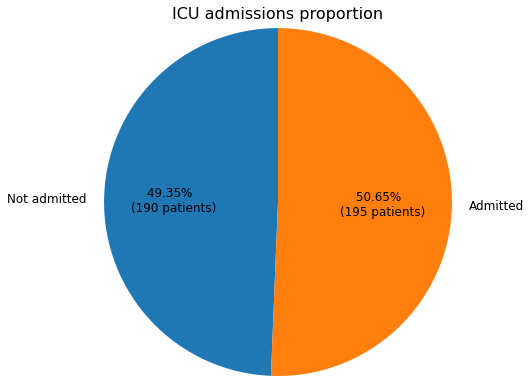

In [12]:
#Proportion of ICU admissions among patients

single_patientdata_df = dataset[dataset['WINDOW'] == 'ABOVE_12']
above_12_df = single_patientdata_df.groupby(by= 'ICU')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()
# above_12_df.columns = ['ICU', 'NUMBER_ADMITTED']
labels = ["Not admitted", "Admitted"]
plt.title('ICU admissions proportion', fontdict= {'fontsize' : 16}, pad=75)
plt.pie(above_12_df['PATIENT_VISIT_IDENTIFIER'],textprops={'fontsize': 12},radius =2, labels = labels, startangle=90, autopct=lambda p : '{:.2f}%  \n({:,.0f} patients)'.format(p,p * sum(above_12_df['PATIENT_VISIT_IDENTIFIER'])/100))
plt.show()

ICU  GENDER    0    1
0         0  108  135
1         1   82   60


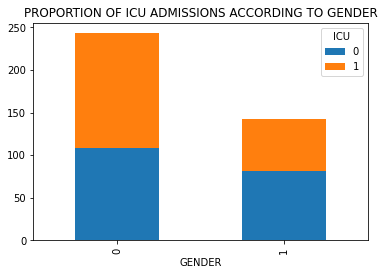

In [13]:
#gender proportions
df = single_patientdata_df.groupby(['GENDER', 'ICU'])['PATIENT_VISIT_IDENTIFIER'].size().reset_index()
df = df.pivot(index='GENDER', columns='ICU', values='PATIENT_VISIT_IDENTIFIER').reset_index()
print(df)
df.plot(x= 'GENDER', kind= 'bar', title='PROPORTION OF ICU ADMISSIONS ACCORDING TO GENDER',stacked= True, mark_right=True)

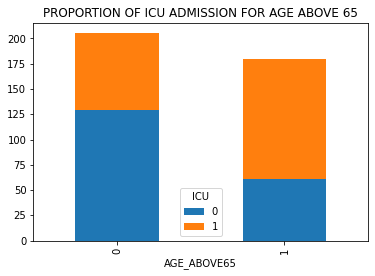

In [14]:
#above_65 proportions
df = single_patientdata_df.groupby(['AGE_ABOVE65', 'ICU'])['PATIENT_VISIT_IDENTIFIER'].size().reset_index()
df = df.pivot(index='AGE_ABOVE65', columns='ICU', values='PATIENT_VISIT_IDENTIFIER').reset_index()
df.plot(x= 'AGE_ABOVE65', kind= 'bar', title='PROPORTION OF ICU ADMISSION FOR AGE ABOVE 65',stacked= True, mark_right=True)


**Exploring Disease groupings**

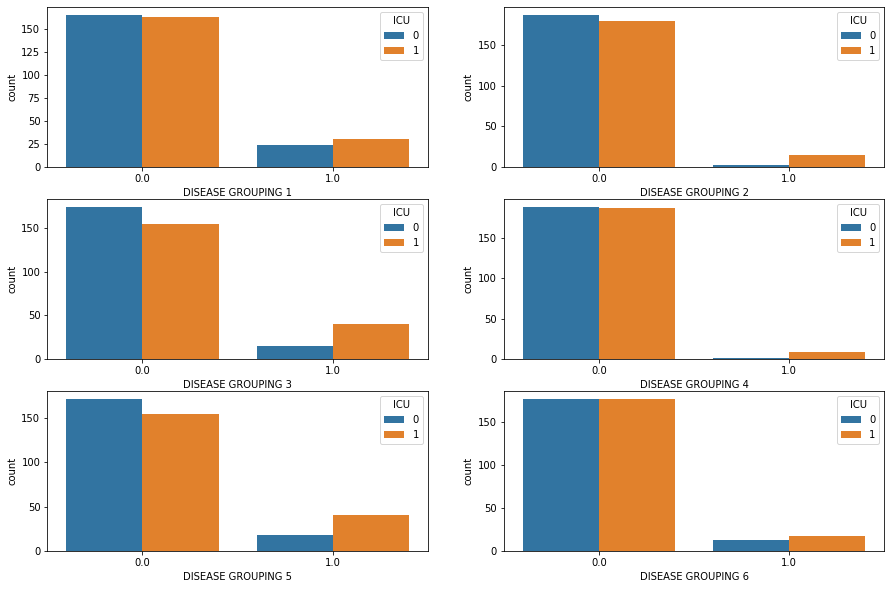

In [15]:
disease_grp = ['DISEASE GROUPING 1','DISEASE GROUPING 2','DISEASE GROUPING 3',
               'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6']

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(15,10))

col = 0

for i in range(len(disease_grp)):
    sns.countplot(x=disease_grp[i], hue="ICU", data=single_patientdata_df, ax = axes[int((i)/2)][col])
    col = (col+1) % 2

**Only Diesease grouping 5 seems to have a slight impact on patients and thereby may increase the need for them to get admitted to ICU for treatment.**

**HTN - Hypertension**

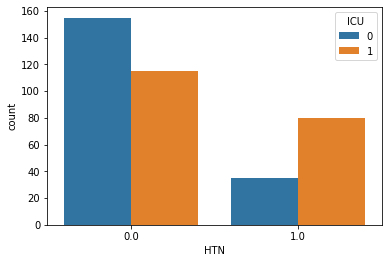

In [16]:
sns.countplot(x="HTN", hue="ICU", data=single_patientdata_df)

# For hypertension - people with hypertension have a slightly higher chance of needing the ICU.
# However, it cannot be claimed with certainity as there are signs of high imbalance.

**IMMUNOCOMPROMISED**

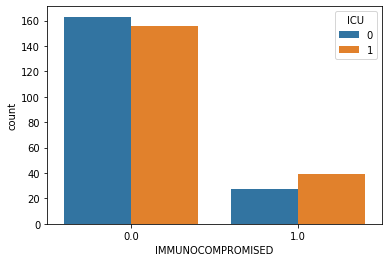

In [17]:
sns.countplot(x="IMMUNOCOMPROMISED", hue="ICU", data=single_patientdata_df)


**Analysis for Vital Signs**

In [18]:
vital_signs = [i for i in single_patientdata_df.loc[:, 'BLOODPRESSURE_DIASTOLIC_MEAN': ]]
vital_signs_df = single_patientdata_df[vital_signs]

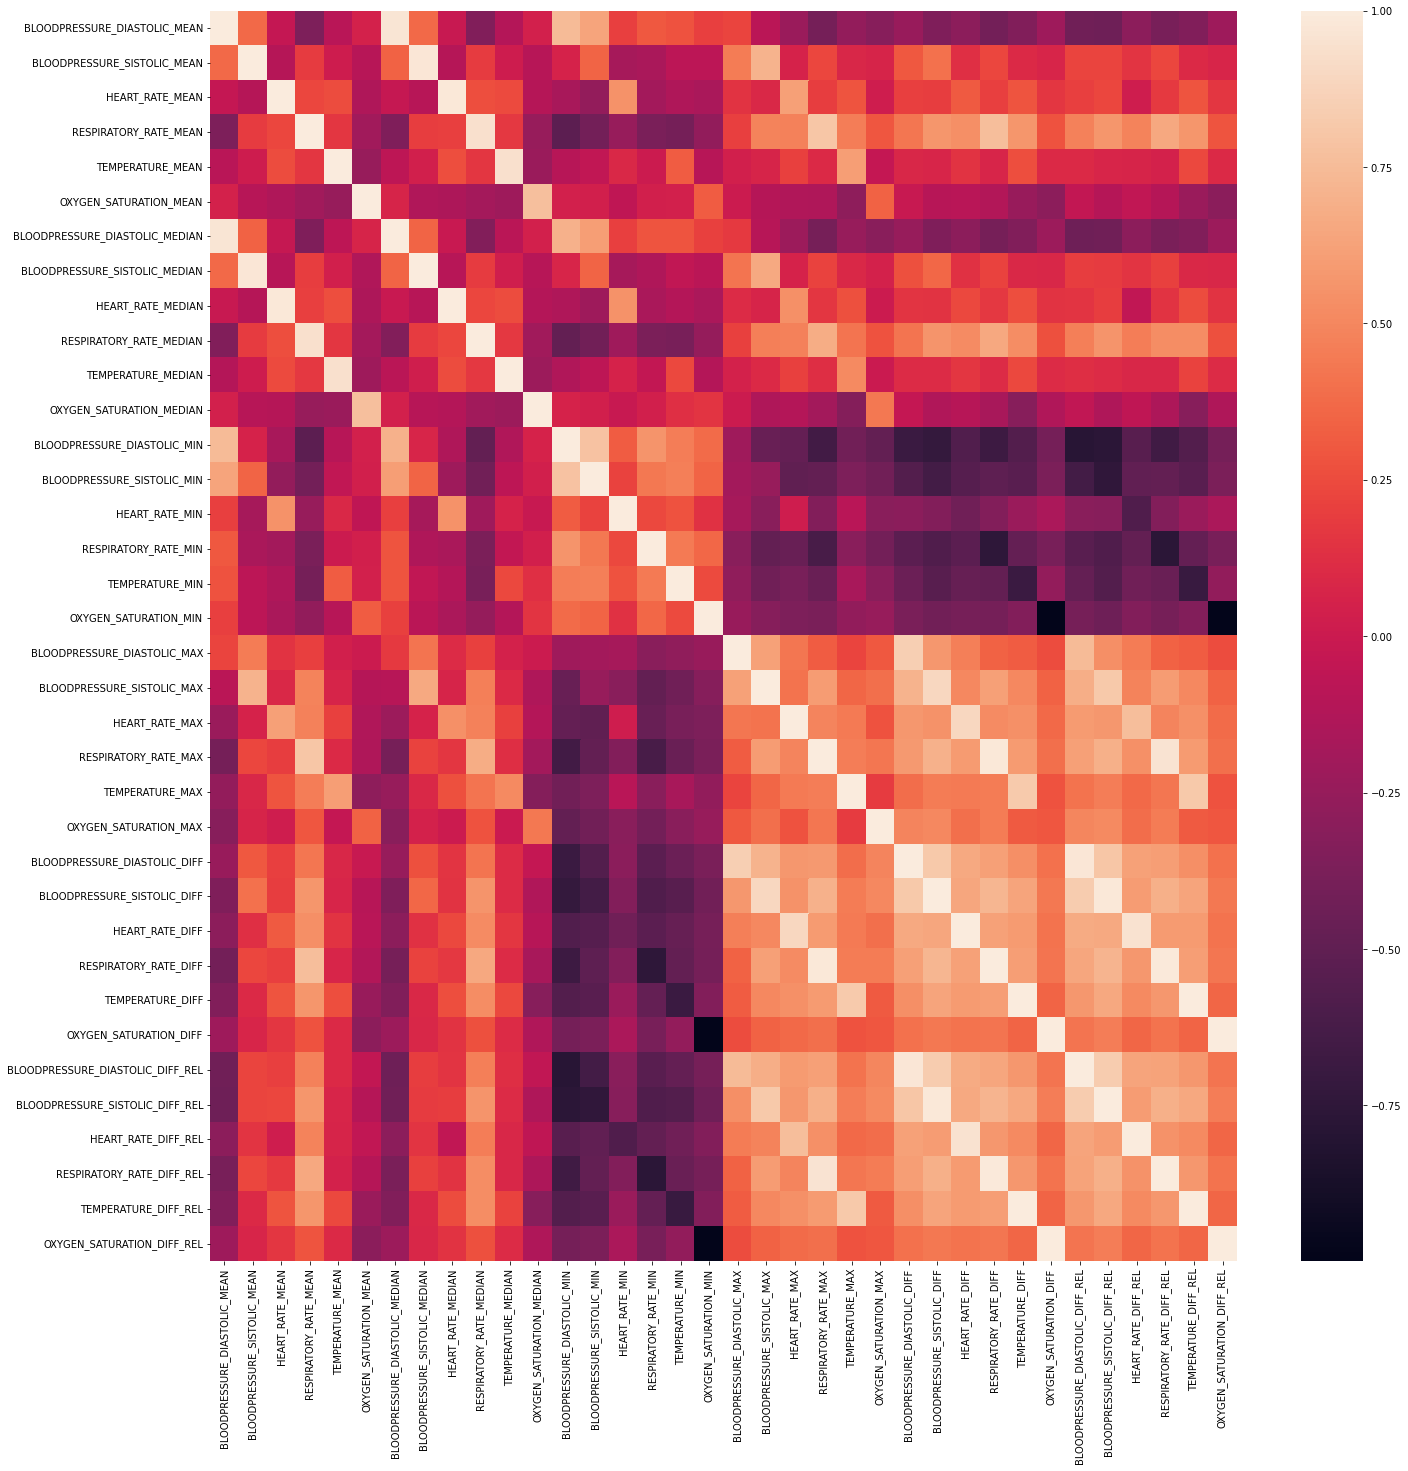

In [19]:
f,ax = plt.subplots(figsize=(23,23))
sns.heatmap(vital_signs_df.drop(columns=['ICU']).corr())
plt.show()

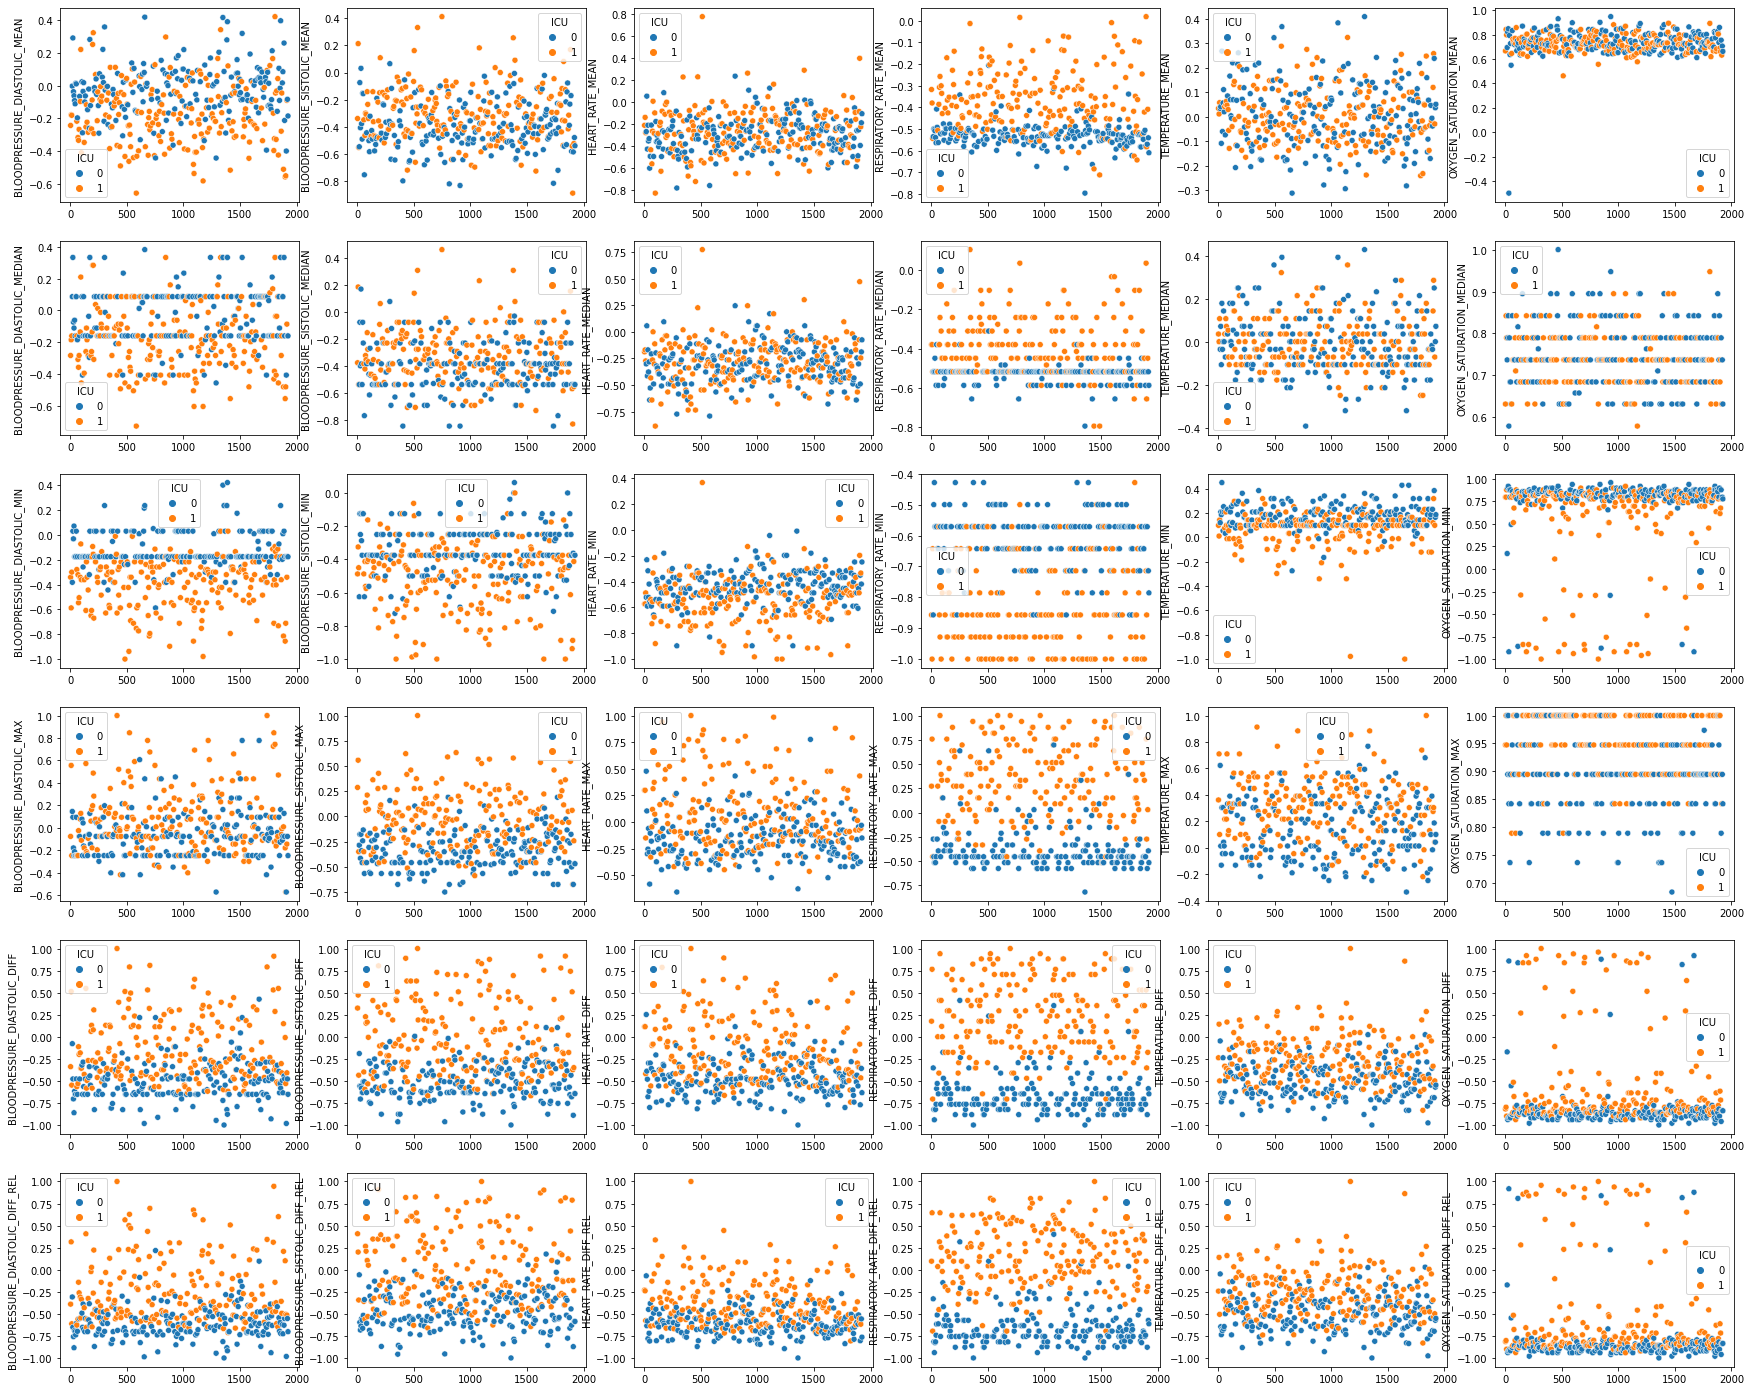

In [20]:
fig, axes = plt.subplots(ncols=6,nrows=6, figsize=(30,25))

col = 0

for i in range(len(vital_signs[:-2])):
    sns.scatterplot(x=single_patientdata_df.index, y =  vital_signs[i], hue="ICU", data=single_patientdata_df, ax = axes[int((i)/6)][col])
    col = (col+1) % 6

From this visualization, we can easily spot features that display no variance in the values of those admitted into ICU and those not admitted, and we can take them out.

In [21]:
#features with similar values for ICU and non-ICU admission status
list_a = ['OXYGEN_SATURATION_MEAN', 'HEART_RATE_MEAN', 'HEART_RATE_MEDIAN']


**Analysis of Lab tests**

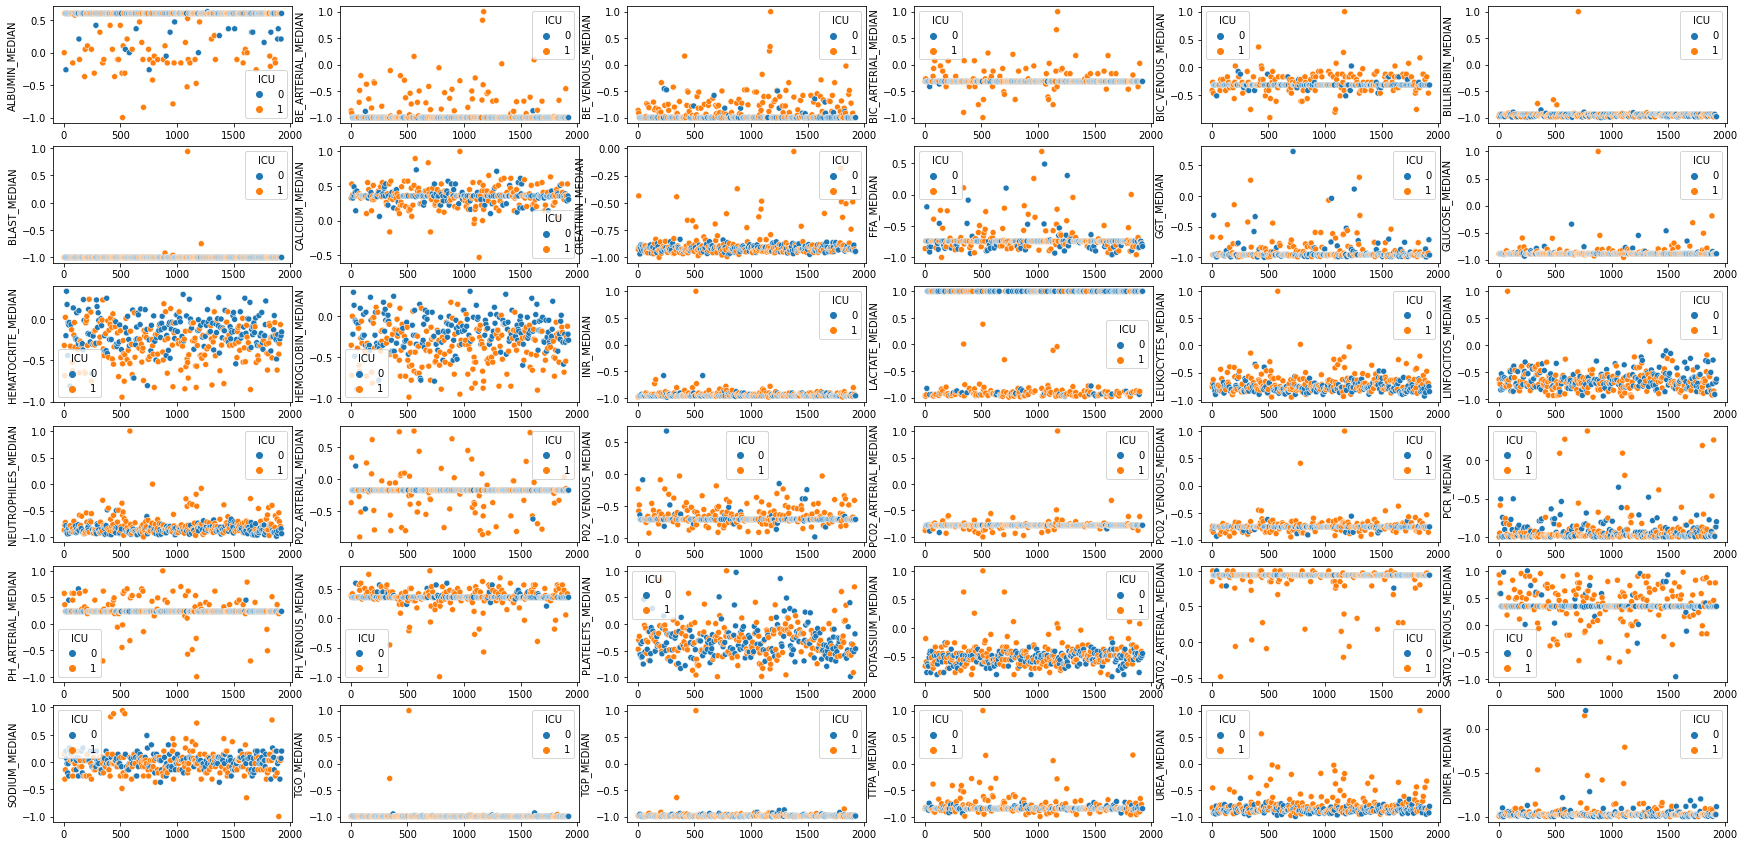

In [22]:
lab_list = [i for i in single_patientdata_df.loc[:, 'ALBUMIN_MEDIAN':'DIMER_MEDIAN']]

fig, axes = plt.subplots(ncols=6,nrows=6, figsize=(30,15))

col = 0

for i in range(len(lab_list)):
    sns.scatterplot(x=single_patientdata_df.index, y =  lab_list[i], hue="ICU", data=single_patientdata_df, ax = axes[int((i)/6)][col])
    col = (col+1) % 6
# sns.scatterplot(x= single_patientdata_df.index, y='BLOODPRESSURE_DIASTOLIC_MEAN', data=single_patientdata_df, hue='ICU')

In [23]:
list_b = ['TGO_MEDIAN', 'TGP_MEDIAN', 'POTASSIUM_MEDIAN', 'LINFOCITOS_MEDIAN', 'BLAST_MEDIAN', 'BILLIRUBIN_MEDIAN', 'SODIUM_MEDIAN', 'DIMER_MEDIAN', 'NEUTROPHILES_MEDIAN']

**Feature Selection and Engineering**

In [24]:
# create new column to indicate if a patient eventually went to ICU (ICU_SUM)
df_admitted = (dataset.groupby("PATIENT_VISIT_IDENTIFIER")["ICU"].sum()>0).reset_index()*1
df_admitted.columns = ["PATIENT_VISIT_IDENTIFIER", "ICU_SUM"]

In [25]:
dataset_admitted = pd.merge(dataset, df_admitted, on = "PATIENT_VISIT_IDENTIFIER")

In [26]:
#keeping only window 0-2 data and drop rows with ICU == 1
dataset = dataset_admitted[(dataset_admitted['WINDOW'] == '0-2') & (dataset_admitted['ICU'] != 1 )]

In [27]:
#drop unnecessary columns
dataset = dataset.drop(list_a, axis=1)
dataset = dataset.drop(list_b, axis=1)

final_data = dataset.drop(["PATIENT_VISIT_IDENTIFIER", "WINDOW", "ICU"],axis = 1)

In [28]:
final_data.shape

(353, 73)

In [29]:
# look for categorical columns and convert them
cat_columns = final_data.select_dtypes(object).columns 
print(cat_columns)
final_data = pd.get_dummies(final_data, columns = cat_columns)

Index(['AGE_PERCENTIL'], dtype='object')


In [30]:
#we reduce dataset  variables by checking correlations  with target column
corr_data = final_data.corrwith(final_data["ICU_SUM"])


In [31]:
corr_data.describe()

count    82.000000
mean      0.035689
std       0.164780
min      -0.225056
25%      -0.049946
50%       0.050908
75%       0.106654
max       1.000000
dtype: float64

In [32]:
#select columns from correlation data with conditions
np_corr_data = np.array(corr_data)
columns = []
for i in np_corr_data:
  if(i):
    if(i>0.04):
      columns.append(True)
    elif(i<-0.02):
      columns.append(True)
    else:
      columns.append(False)
  else:
    columns.append(False)

print(len(columns), columns.count(True))
selection = np.array(columns)
#print(selection)
selected_final_data = final_data.loc[:, selection]
selected_final_data.head()

82 73


,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,P02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,ICU_SUM,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th
0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-0.317073,-0.317073,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.170732,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,0.939394,0.345679,-0.825613,-0.836145,0.086420,-0.230769,-0.593220,-0.285714,0.086420,-0.230769,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,0,0,0,0,0,0,0
10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-0.317073,-0.317073,0.357143,-0.912243,-0.742004,-0.958528,-0.780261,0.144654,0.158537,-0.959849,1.000000,-0.382773,-0.170732,-0.77931,-0.754601,-0.939887,0.234043,0.363636,-0.399199,0.939394,0.345679,-0.846633,-0.836145,-0.489712,-0.685470,-0.645951,0.357143,-0.506173,-0.815385,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-0.515528,-0.351328,-0.756272,1,1,0,0,0,0,0,0
15,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-1.0,-1.0,-0.317073,-0.317073,0.326531,-0.968861,-0.194030,-0.316589,-0.891993,-0.203354,-0.219512,-0.959849,-0.828421,-0.729239,-0.170732,-0.77931,-0.779141,-0.503592,0.234043,0.363636,-0.564753,0.939394,0.580247,-0.846633,-0.937349,0.012346,-0.369231,-0.457627,-0.285714,0.012346,-0.369231,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,0,0,1,0,0,0
20,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-0.317073,-0.317073,0.357143,-0.913659,-0.829424,-0.938084,-0.851024,0.358491,0.304878,-0.959849,1.000000,-0.702202,-0.170732,-0.77931,-0.754601,-0.990926,0.234043,0.363636,-0.457944,0.939394,0.345679,-0.846633,-0.903614,0.333333,-0.153846,-0.593220,0.285714,0.333333,-0.153846,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.877301,-0.923664,-0.882353,-1.000000,-0.883669,-0.870968,0,1,0,0,0,0,0,0
25,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-0.317073,-0.317073,0.357143,-0.891012,-0.742004,-0.958528,-0.891993,0.291405,0.243902,-0.959849,1.000000,-0.706450,-0.170732,-0.77931,-0.754601,-0.997732,0.234043,0.363636,-0.292390,0.939394,0.345679,-0.846633,-0.884337,-0.037037,-0.538462,-0.525424,-0.1

**MODEL AND EVALUATION**

Decision Tree Classifier

In [45]:
#create x and y data
X_data = selected_final_data.drop(['ICU_SUM'], axis = 1)
Y_data = selected_final_data[['ICU_SUM']]

In [47]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.30, random_state=1)

In [48]:
#fit model
model =tree.DecisionTreeClassifier(criterion='entropy',max_depth=4,max_leaf_nodes=10)
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
#model prediction 
y_pred = model.predict(X_test)

In [50]:
#accuracy, precision and recall
print("Accuracy:{:.6f}".format(accuracy_score(Y_test, y_pred)))
print("Precision:{:.6f}".format(precision_score(Y_test, y_pred)))
print("Recall:{:.6f}".format(recall_score(Y_test, y_pred)))

Accuracy:0.594340
Precision:0.545455
Recall:0.510638


Gaussian Naive Bayes


In [51]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred1=gnb.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
# evaluate predictions
accuracy = accuracy_score(Y_test, Y_pred1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 59.43%


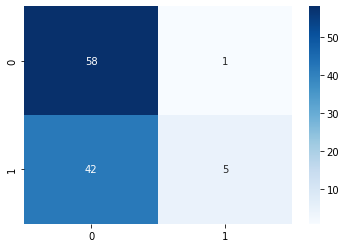

In [53]:
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(Y_test, Y_pred1)) 
sns.heatmap(confusion_matrix, annot=True, cmap="Blues")

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
Ext = ExtraTreesClassifier()
Ext.fit(X_train,Y_train)
y_pred2=Ext.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
# evaluate predictions
accuracy = accuracy_score(Y_test, y_pred2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 71.70%


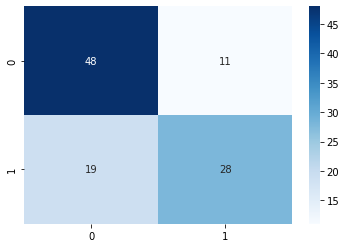

In [56]:
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(Y_test, y_pred2)) 
sns.heatmap(confusion_matrix, annot=True, cmap="Blues")


XGB Classifier

In [57]:
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(X_train,Y_train)
y_pred3=XGB.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
# evaluate predictions
accuracy = accuracy_score(Y_test, y_pred3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 71.70%


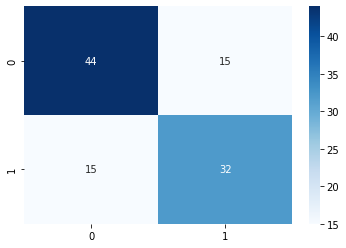

In [59]:
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(Y_test, y_pred3)) 
sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
